In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [ ]:
carbon_data=pd.read_csv("https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-02-18/food_consumption.csv")
carbon_data.columns

Index(['country', 'food_category', 'consumption', 'co2_emmission'], dtype='object')

In [4]:
carbon_data.head()

,country,food_category,consumption,co2_emmission
0,Argentina,Pork,10.51,37.20
1,Argentina,Poultry,38.66,41.53
2,Argentina,Beef,55.48,1712.00
3,Argentina,Lamb & Goat,1.56,54.63
4,Argentina,Fish,4.36,6.96


In [5]:
carbon_data.isnull().sum()

country          0
food_category    0
consumption      0
co2_emmission    0
dtype: int64

In [6]:
carbon_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1430 entries, 0 to 1429
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   country        1430 non-null   object 
 1   food_category  1430 non-null   object 
 2   consumption    1430 non-null   float64
 3   co2_emmission  1430 non-null   float64
dtypes: float64(2), object(2)
memory usage: 44.8+ KB


In [8]:
carbon_data.describe().round(2)

,consumption,co2_emmission
count,1430.00,1430.00
mean,28.11,74.38
std,49.82,152.10
min,0.00,0.00
25%,2.36,5.21
50%,8.89,16.53
75%,28.13,62.60
max,430.76,1712.00


Exploratory Data Analysis (EDA)
Now that we understand the dataset, let’s move forward with:

Filter Data for East African Countries (Kenya, Uganda, Tanzania, Rwanda, Ethiopia).

Check Unique Food Categories – What foods are listed?

Summarize CO2 Emissions Per Country – Average CO2 emissions per country.

Summarize CO2 Emissions Per Food Category – Which foods have the highest footprint?


In [11]:
# Filter data for East African countries
east_african_countries = ['Kenya', 'Uganda', 'Tanzania', 'Rwanda', 'Ethiopia']
east_africa_data = carbon_data[carbon_data['country'].isin(east_african_countries)]
east_africa_data



,country,food_category,consumption,co2_emmission
902,Kenya,Pork,0.29,1.03
903,Kenya,Poultry,0.47,0.50
904,Kenya,Beef,9.54,294.38
905,Kenya,Lamb & Goat,1.86,65.14
906,Kenya,Fish,4.27,6.82
907,Kenya,Eggs,1.84,1.69
908,Kenya,Milk - inc. cheese,94.86,135.12
909,Kenya,Wheat and Wheat Products,34.65,6.61
910,Kenya,Rice,12.94,16.56
911,Kenya,Soybeans,0.20,0.09


In [12]:
# Check unique food categories
unique_food_categories = east_africa_data['food_category'].unique()
unique_food_categories


array(['Pork', 'Poultry', 'Beef', 'Lamb & Goat', 'Fish', 'Eggs',
       'Milk - inc. cheese', 'Wheat and Wheat Products', 'Rice',
       'Soybeans', 'Nuts inc. Peanut Butter'], dtype=object)

In [13]:
# Summarize CO2 emissions per country
co2_emissions_per_country = east_africa_data.groupby('country')['co2_emmission'].mean().round(2)
co2_emissions_per_country


country
Ethiopia    21.99
Kenya       48.26
Rwanda      16.51
Tanzania    31.18
Uganda      27.70
Name: co2_emmission, dtype: float64

In [14]:
# Summarize CO2 emissions per food category
co2_emissions_per_food_category = east_africa_data.groupby('food_category')['co2_emmission'].sum().sort_values(ascending=False).round(2)
co2_emissions_per_food_category

food_category
Beef                        830.69
Milk - inc. cheese          318.77
Lamb & Goat                 276.31
Rice                         63.40
Fish                         42.14
Nuts inc. Peanut Butter      23.25
Wheat and Wheat Products     19.70
Pork                         16.85
Poultry                       6.25
Eggs                          3.59
Soybeans                      1.18
Name: co2_emmission, dtype: float64

CO2 Emissions Per Person by Food Category in East Africa

Goal: Compare the average CO2 emissions per food category in Kenya, Uganda, Tanzania, Rwanda, and Ethiopia.

Approach:
Filter the dataset for the five East African countries.

Group by food_category and compute the average CO2 emissions for each category.

Create a bar chart to visualize the differences.

Interpret insights: Which foods have the highest carbon footprint? Which are the lowest?


In [15]:
# Group by food_category and compute the average CO2 emissions for each category
avg_co2_emissions_per_food_category = east_africa_data.groupby('food_category')['co2_emmission'].mean().sort_values(ascending=False).round(2)
avg_co2_emissions_per_food_category

food_category
Beef                        166.14
Milk - inc. cheese           63.75
Lamb & Goat                  55.26
Rice                         12.68
Fish                          8.43
Nuts inc. Peanut Butter       4.65
Wheat and Wheat Products      3.94
Pork                          3.37
Poultry                       1.25
Eggs                          0.72
Soybeans                      0.24
Name: co2_emmission, dtype: float64

C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\1798797434.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_co2_emissions_per_food_category.values, y=avg_co2_emissions_per_food_category.index, palette='viridis')


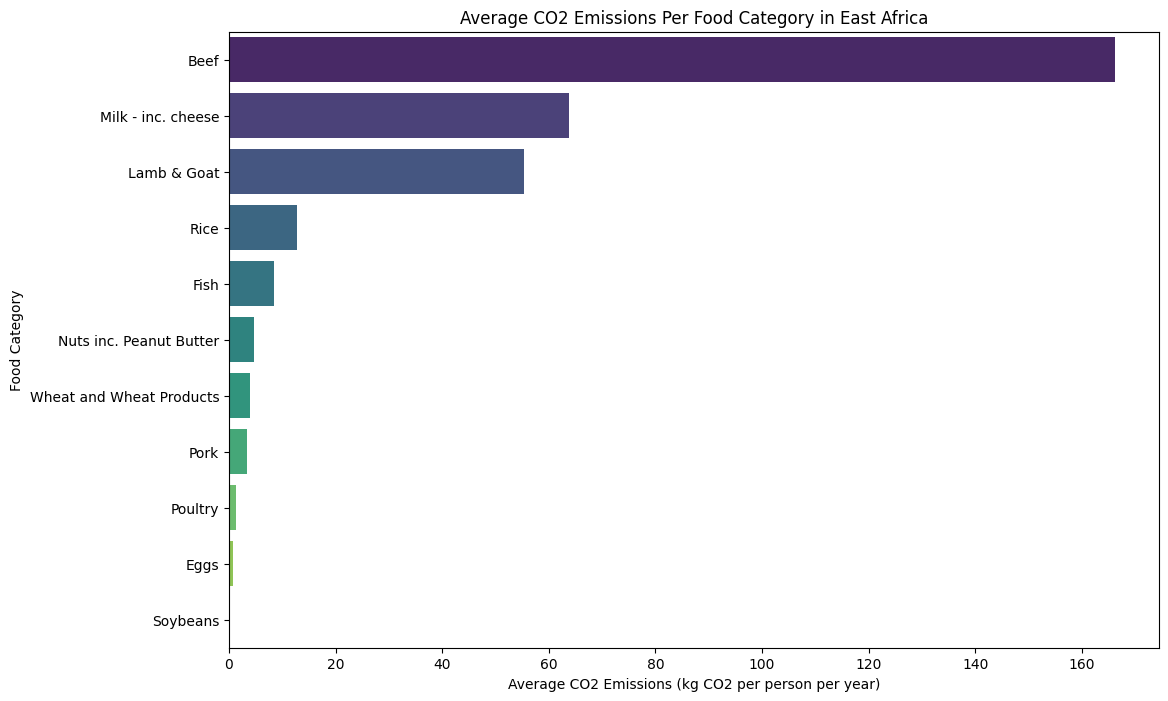

In [16]:
# Create a bar chart to visualize the differences
plt.figure(figsize=(12, 8))
sns.barplot(x=avg_co2_emissions_per_food_category.values, y=avg_co2_emissions_per_food_category.index, palette='viridis')
plt.xlabel('Average CO2 Emissions (kg CO2 per person per year)')
plt.ylabel('Food Category')
plt.title('Average CO2 Emissions Per Food Category in East Africa')
plt.show()


Highlighting Differences in Specific Food Products

Goal: Identify a food product where there is a significant difference in CO2 emissions across these five countries.

Approach:

Pick a food category (e.g., Beef, Dairy, Rice, etc.).

Compare CO2 emissions per country for this category.

Create a bar chart to highlight the differences.

Interpret insights: Why might these differences exist? 


C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\4159329434.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='country', y='co2_emmission', data=beef_data, palette='viridis')


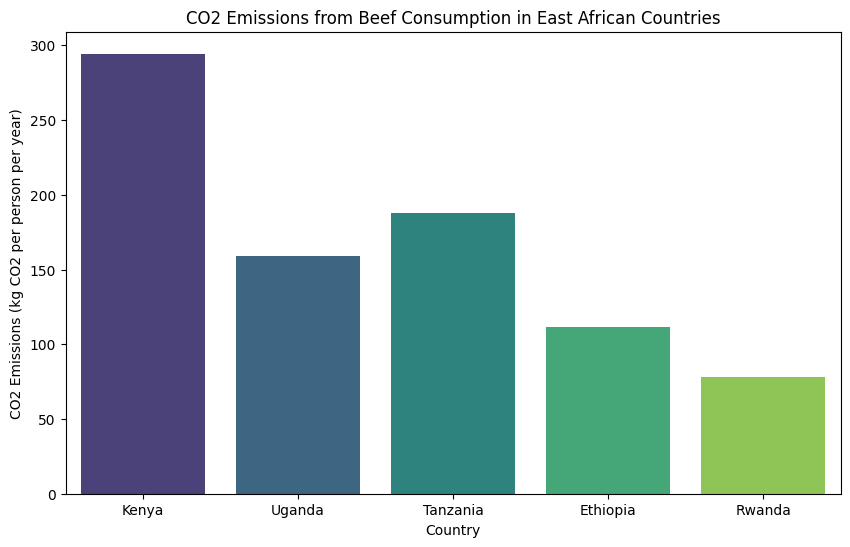

In [17]:
# Filter data for the chosen food category
food_category = 'Beef'
beef_data = east_africa_data[east_africa_data['food_category'] == food_category]

# Create a bar chart to compare CO2 emissions per country for the chosen food category
plt.figure(figsize=(10, 6))
sns.barplot(x='country', y='co2_emmission', data=beef_data, palette='viridis')
plt.xlabel('Country')
plt.ylabel('CO2 Emissions (kg CO2 per person per year)')
plt.title(f'CO2 Emissions from {food_category} Consumption in East African Countries')
plt.show()

Food Consumption of Animal vs. Non-Animal Products

Goal: Compare the carbon footprint of animal-based vs. plant-based food consumption.


Approach:

Categorize food products into animal-based (e.g., beef, dairy, poultry, fish) and plant-based (e.g., grains, vegetables, legumes).

Aggregate total CO2 emissions for each category.

Visualize using a bar chart or pie chart (showing % of total emissions).

Interpret insights:

Do animal-based foods contribute significantly more to emissions?

Which type of food has the highest/lowest impact?

Could shifting to plant-based diets reduce emissions in East Africa?

In [ ]:
# Categorize food products
animal_based = ['Beef', 'Milk - inc. cheese', 'Poultry', 'Fish', 'Eggs', 'Lamb & Goat', 'Pork']
plant_based = ['Rice', 'Wheat and Wheat Products', 'Soybeans', 'Nuts inc. Peanut Butter']

# Aggregate total CO2 emissions for each category
animal_based_emissions = east_africa_data[east_africa_data['food_category'].isin(animal_based)]['co2_emmission'].sum()
plant_based_emissions = east_africa_data[east_africa_data['food_category'].isin(plant_based)]['co2_emmission'].sum()

# Create a dataframe for visualization
emissions_data = pd.DataFrame({
    'Category': ['Animal-Based', 'Plant-Based'],
    'Total CO2 Emissions': [animal_based_emissions, plant_based_emissions]
})

emissions_data



,Category,Total CO2 Emissions
0,Animal-Based,1494.60
1,Plant-Based,107.53


In [32]:
# Find the food category with the highest CO2 emissions
highest_impact_food = avg_co2_emissions_per_food_category.idxmax()
highest_impact_value = avg_co2_emissions_per_food_category.max()

# Find the food category with the lowest CO2 emissions
lowest_impact_food = avg_co2_emissions_per_food_category.idxmin()
lowest_impact_value = avg_co2_emissions_per_food_category.min()

print(f"The food category with the highest CO2 emissions is {highest_impact_food} with {highest_impact_value} kg CO2 per person per year.")
print(f"The food category with the lowest CO2 emissions is {lowest_impact_food} with {lowest_impact_value} kg CO2 per person per year.")

The food category with the highest CO2 emissions is Beef with 166.14 kg CO2 per person per year.
The food category with the lowest CO2 emissions is Soybeans with 0.24 kg CO2 per person per year.


C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\217960143.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Category', y='Total CO2 Emissions', data=emissions_data, palette='viridis')


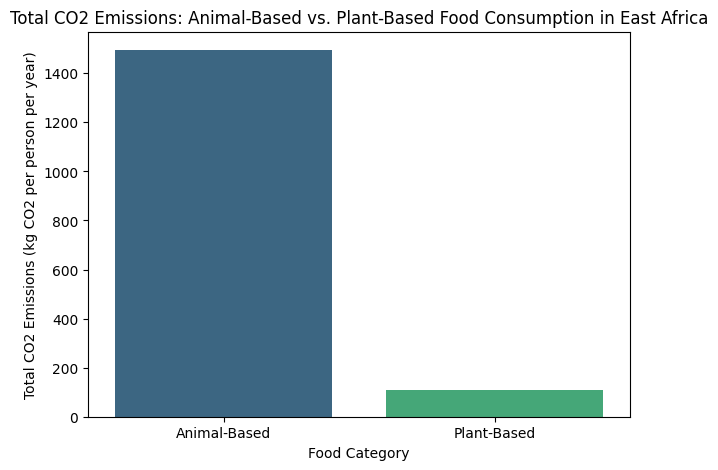

In [28]:
# Visualize using a bar chart
plt.figure(figsize=(7, 5))
sns.barplot(x='Category', y='Total CO2 Emissions', data=emissions_data, palette='viridis')
plt.xlabel('Food Category')
plt.ylabel('Total CO2 Emissions (kg CO2 per person per year)')
plt.title('Total CO2 Emissions: Animal-Based vs. Plant-Based Food Consumption in East Africa')
plt.show()



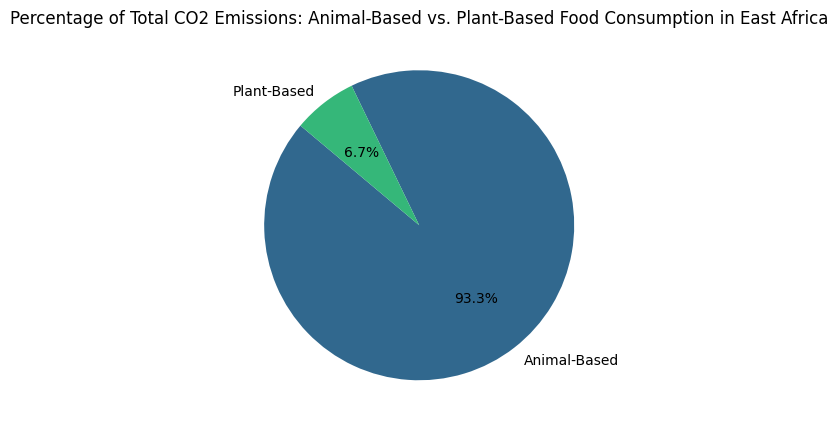

In [24]:
# Visualize using a pie chart
plt.figure(figsize=(5, 6))
plt.pie(emissions_data['Total CO2 Emissions'], labels=emissions_data['Category'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', 2))
plt.title('Percentage of Total CO2 Emissions: Animal-Based vs. Plant-Based Food Consumption in East Africa')
plt.show()

Mapping Beef's Contribution to CO₂ Emissions

Goal: Visualize how much CO₂ emissions (kg/person/year) come from beef consumption across different countries.

Approach:

Filter the dataset for the food category = Beef.

Group by country and calculate total or average CO₂ emissions from beef.

Create a map visualization (Choropleth map or heatmap) to show the distribution.

Interpret insights:

Which country has the highest emissions from beef?

Are East African countries high or low compared to global trends?

What could be the reasons behind the differences (e.g., diet preferences, livestock industry)?

In [33]:
import plotly.express as px

# Filter the dataset for the food category = Beef
beef_data_global = carbon_data[carbon_data['food_category'] == 'Beef']

# Group by country and calculate total CO₂ emissions from beef
beef_emissions_per_country = beef_data_global.groupby('country')['co2_emmission'].sum().reset_index()

# Create a Choropleth map to show the distribution
fig = px.choropleth(beef_emissions_per_country, 
                    locations="country", 
                    locationmode='country names', 
                    color="co2_emmission",
                    hover_name="country", 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Total CO₂ Emissions from Beef Consumption (kg CO₂ per person per year)")

fig.show()

In [34]:
# Find the country with the highest emissions from beef
highest_beef_emissions_country = beef_emissions_per_country.loc[beef_emissions_per_country['co2_emmission'].idxmax()]
highest_beef_emissions_country_name = highest_beef_emissions_country['country']
highest_beef_emissions_value = highest_beef_emissions_country['co2_emmission']

print(f"The country with the highest emissions from beef is {highest_beef_emissions_country_name} with {highest_beef_emissions_value} kg CO2 per person per year.")

# Compare East African countries to global trends
east_african_beef_emissions = beef_emissions_per_country[beef_emissions_per_country['country'].isin(east_african_countries)]
global_avg_beef_emissions = beef_emissions_per_country['co2_emmission'].mean()

print("East African countries' beef emissions compared to global average:")
print(east_african_beef_emissions)
print(f"Global average CO2 emissions from beef: {global_avg_beef_emissions:.2f} kg CO2 per person per year")

The country with the highest emissions from beef is Argentina with 1712.0 kg CO2 per person per year.
East African countries' beef emissions compared to global average:
      country  co2_emmission
36   Ethiopia         111.40
63      Kenya         294.38
99     Rwanda          78.07
114  Tanzania         187.92
121    Uganda         158.92
Global average CO2 emissions from beef: 374.10 kg CO2 per person per year


Box Plot for CO₂ Emissions Across Food Categories

Goal: Show the spread and distribution of CO₂ emissions across different food categories.

Approach:

Group data by food_category and analyze CO₂ emissions.

Create a box plot where:

The x-axis represents different food categories.

The y-axis represents CO₂ emissions.

Interpret insights:

Which food category has the highest variation in CO₂ emissions?

Are there any outliers?

Which food types consistently produce high emissions?

C:\Users\Admin\AppData\Local\Temp\ipykernel_9884\428374755.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




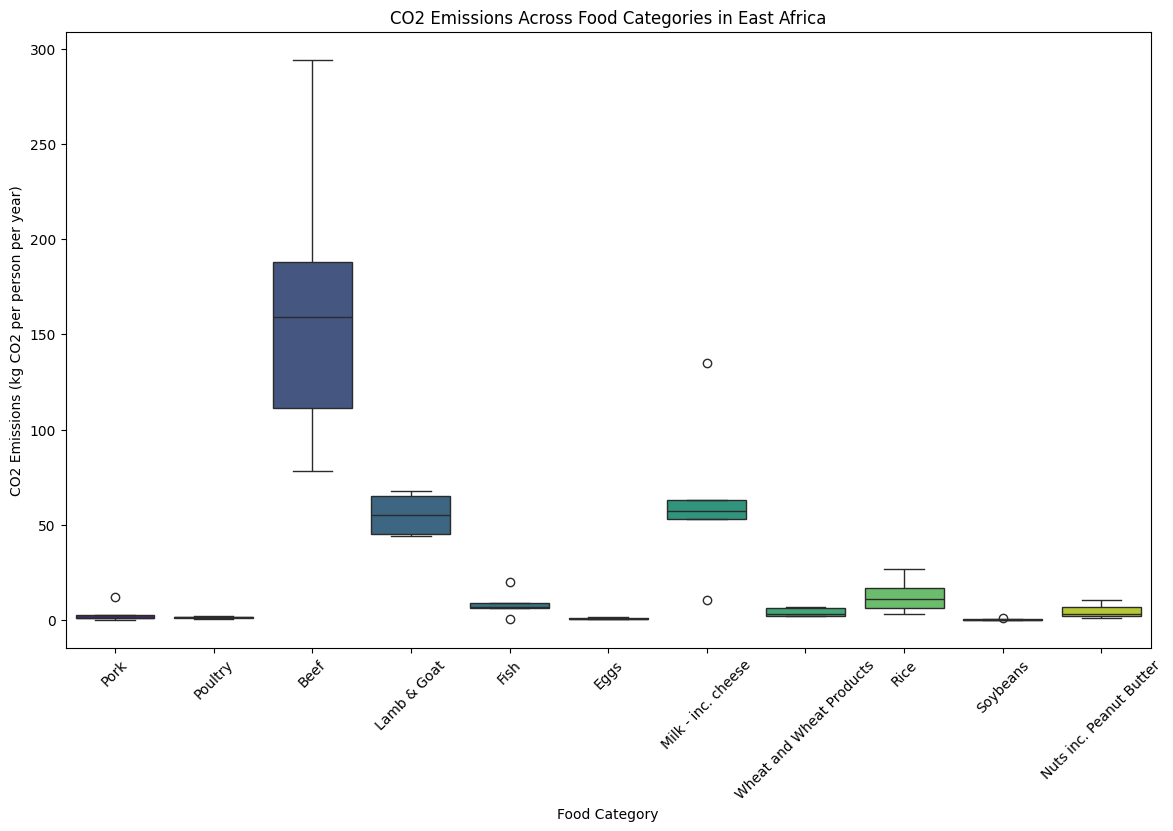

In [35]:
# Create a box plot to show the spread and distribution of CO₂ emissions across different food categories
plt.figure(figsize=(14, 8))
sns.boxplot(x='food_category', y='co2_emmission', data=east_africa_data, palette='viridis')
plt.xlabel('Food Category')
plt.ylabel('CO2 Emissions (kg CO2 per person per year)')
plt.title('CO2 Emissions Across Food Categories in East Africa')
plt.xticks(rotation=45)
plt.show()

In [36]:
# Calculate the variation in CO₂ emissions for each food category
variation = east_africa_data.groupby('food_category')['co2_emmission'].std().sort_values(ascending=False)
highest_variation_food = variation.idxmax()
highest_variation_value = variation.max()

print(f"The food category with the highest variation in CO₂ emissions is {highest_variation_food} with a standard deviation of {highest_variation_value:.2f} kg CO₂ per person per year.")



The food category with the highest variation in CO₂ emissions is Beef with a standard deviation of 83.25 kg CO₂ per person per year.


In [37]:
# Identify outliers in the CO₂ emissions data
outliers = east_africa_data.groupby('food_category')['co2_emmission'].apply(lambda x: x[(x - x.mean()).abs() > 1.5 * x.std()])
outliers = outliers.dropna()

print("Outliers in CO₂ emissions data:")
outliers

Outliers in CO₂ emissions data:


food_category                
Beef                     904     294.38
Eggs                     907       1.69
Fish                     1093     19.96
Milk - inc. cheese       908     135.12
Nuts inc. Peanut Butter  1132     10.51
Pork                     1089     11.93
Soybeans                 1285      0.87
Name: co2_emmission, dtype: float64

In [38]:
# Identify food types that consistently produce high emissions
high_emission_threshold = east_africa_data['co2_emmission'].mean() + east_africa_data['co2_emmission'].std()
high_emission_foods = east_africa_data[east_africa_data['co2_emmission'] > high_emission_threshold]['food_category'].unique()

print("Food types that consistently produce high emissions:")
high_emission_foods

Food types that consistently produce high emissions:


array(['Beef', 'Milk - inc. cheese'], dtype=object)

Identifying and Visualizing the Top 10 Countries

Goal: Highlight the top 10 countries contributing the most to food-related CO₂ emissions.

Approach:

Group data by country and sum the total co2_emmission.

Sort the countries in descending order and select the top 10.

Choose the best visualization (Bar chart or horizontal bar chart recommended for clarity).

Interpret insights:

Which country has the highest food-related CO₂ emissions?

Any surprising trends?

What could be the contributing factors (diet, population, agriculture practices)?


In [ ]:
# Group data by country and sum the total CO2 emissions
total_co2_emissions_per_country = carbon_data.groupby('country')['co2_emmission'].sum().sort_values(ascending=False)

# Select the top 10 countries
top_10_countries = total_co2_emissions_per_country.head(10)

# Create a bar chart to visualize the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='viridis')
plt.xlabel('Total CO2 Emissions (kg CO2 per person per year)')
plt.ylabel('Country')
plt.title('Top 10 Countries Contributing the Most to Food-Related CO2 Emissions')
plt.show()



In [ ]:

# Interpret insights
highest_emission_country = top_10_countries.idxmax()
highest_emission_value = top_10_countries.max()

print(f"The country with the highest food-related CO2 emissions is {highest_emission_country} with {highest_emission_value:.2f} kg CO2 per person per year.")